In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import metrics

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1. Read `titanic.csv` into a DataFrame.
data = pd.read_csv('../data/titanic.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 2. What is the null accuracy rate for predicting survival? (recall this means the probability of choosing the 
# largest unique category, either survived or not)

counts = data.groupby('Survived').count().Pclass
null_accuracy = counts.max().astype(float)/counts.sum()
counts
null_accuracy

0.61616161616161613

In [23]:
data['SexNum'] = (data['Sex']=='male').astype(int) # male = 1, female = 0
data['SexNum'].head()

PassengerId
1    1
2    0
3    0
4    0
5    1
Name: SexNum, dtype: int64

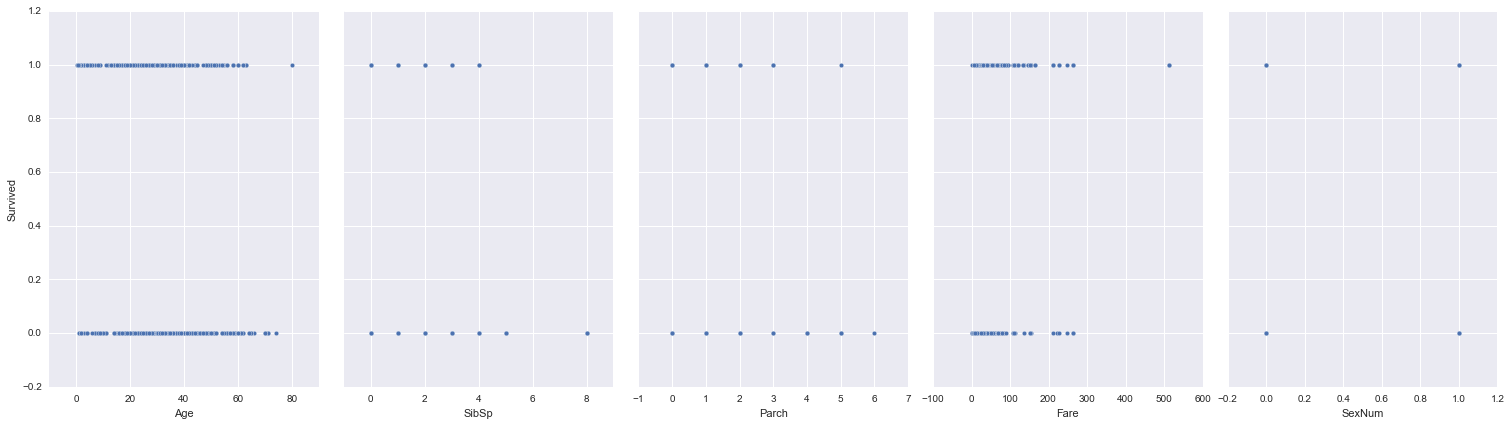

In [25]:
# 3. Can you think of some variables that are in the dataset that might contribute to predicting survival of the crash?
# Pclass, Sex, Age, Sibsp, Parch...fare? 
# plt.scatter(data.Pclass,data.Sex)
sns.pairplot(data, x_vars=['Age','SibSp','Parch','Fare','SexNum'], y_vars='Survived', size=6, aspect=0.7)


In [90]:
# 4. Define Pclass and Parch as the features, and Survived as the response.
feature_cols = ['Pclass','Parch']
x = data[feature_cols]
y = data['Survived']

In [91]:
# 5. Split the data into training and testing sets. (Hint: use the train test split modules from sklearn)
x_train, x_test, y_train, y_test = train_test_split(x, y) #, random_state=1)

In [92]:
# 6. Fit a logistic regression model and examine the coefficients to confirm that they make intuitive sense.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() #C=1e9)
logreg.fit(x_train, y_train)
print 'intercept: ', logreg.intercept_
print 'coeff: ', logreg.coef_
zip (feature_cols, logreg.coef_[0])

intercept:  [ 1.30269422]
coeff:  [[-0.79835802  0.25794268]]


[('Pclass', -0.79835801851559873), ('Parch', 0.25794268431515754)]

In [96]:
print 'pclass 3, parch 0: ', logreg.predict_proba([3,0])
print 'pclass 3, parch 3: ', logreg.predict_proba([3,3])
print 'pclass 1, parch 0: ', logreg.predict_proba([1,0])

pclass 3, parch 0:  [[ 0.7488296  0.2511704]]
pclass 3, parch 3:  [[ 0.57897127  0.42102873]]
pclass 1, parch 0:  [[ 0.37652219  0.62347781]]


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [119]:
# 7. Make predictions on the testing set and calculate the accuracy.
y_pred = logreg.predict(x_test)
tf = np.abs(y_pred - y_test)
accuracy = 1 - float(tf.sum())/len(tf)
accuracy

0.7174887892376682

In [120]:
# 8. Create a confusion matrix and document the model's sensitivity and specificity. 
# (remember you should run metrics on your test classes!)
from sklearn import metrics
preds = logreg.predict(x)
print metrics.confusion_matrix(y, preds)


[[461  88]
 [190 152]]


In [59]:
data.isnull().sum()
dataCleanAge = data.drop('Cabin',axis=1).dropna()

In [121]:
# 9. Also include Age as a feature, and calculate the testing accuracy. 
# There will be a small issue you'll have to deal with. What is it? How will you deal with it?
feature_cols = ['Pclass','Parch','Age','SexNum']
x = dataCleanAge[feature_cols]
y = dataCleanAge['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y) #, random_state=1)
logreg = LogisticRegression(C=1e9)
logreg.fit(x_train, y_train)
print 'intercept: ', logreg.intercept_
print 'coeff: ', logreg.coef_
y_pred = logreg.predict(x_test)
tf = np.abs(y_pred - y_test)
accuracy = 1 - float(tf.sum())/len(tf)
print 'accuracy', accuracy
preds = logreg.predict(x)
print 'confusing matrix: \n', metrics.confusion_matrix(y, preds)

intercept:  [ 5.04813081]
coeff:  [[-1.18037593 -0.13812356 -0.03957768 -2.68803665]]
accuracy 0.780898876404
confusing matrix: 
[[361  63]
 [ 83 205]]


In [70]:
# 10. Try to make up a new column (be creative!) that you think might be helpful.
# For example one student make a column called "is_married" which was a combination of SibSp and the name column and include this new column.
dataCleanAge['isChild'] = 

In [ ]:
# 11. In any of your models, were you able to beat the null accuracy rate?
# Always remember to fit your model on the training data and run metrics on the test set.